# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

In [2]:
qmc_points = np.loadtxt('../sobol_6_8000.txt')
qmc_points = qmc_points[1:].reshape((8000,6))

large_qmc_points = np.loadtxt('../sobol_6_131072.txt')
all_points = qmc_points.copy()
forces = np.array(np.loadtxt('../force_6_params.dat'))


N = min(qmc_points.shape[0], forces.shape[0])
qmc_points = qmc_points[:N,:]
forces  = forces[:N,:]


input_size=6
train_size=128
validation_size=128

epochs = 5

airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]


# Network sizes

Find the optimal network size


Config 4 x 6 ([0 x 0] / [1 x 1])
Training and postprocessing took: 3372.4536390304565 seconds (56.20756065050761 minutes) (0.9367926775084602 hours)
all_errors_map[Prediction error]=\ 
[[0.01812623]]


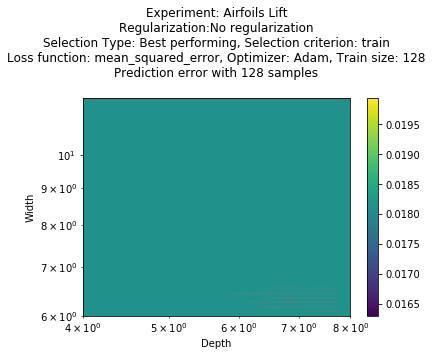

Memory usage: 518040
all_errors_map[Error mean]=\ 
[[0.00034627]]


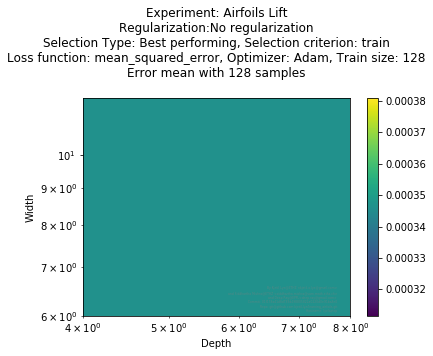

Memory usage: 518040
all_errors_map[Error variance]=\ 
[[0.0046528]]


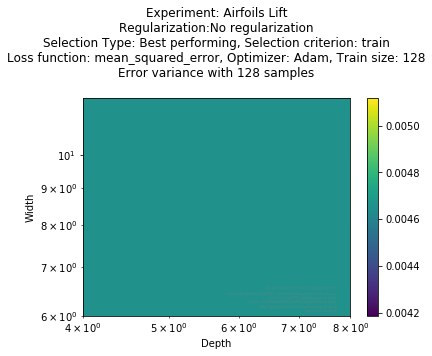

Memory usage: 518040
all_errors_map[Wasserstein]=\ 
[[0.00446625]]


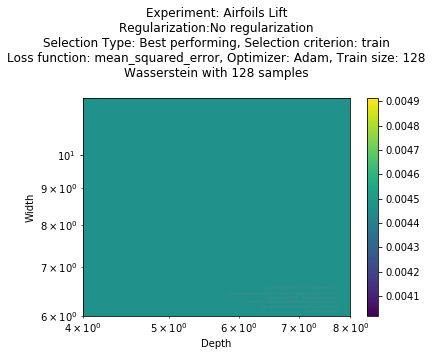

Memory usage: 518040
all_errors_map[Selection error (train)]=\ 
[[0.00684049]]


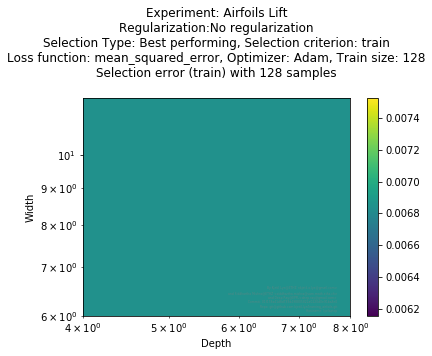

Memory usage: 518040


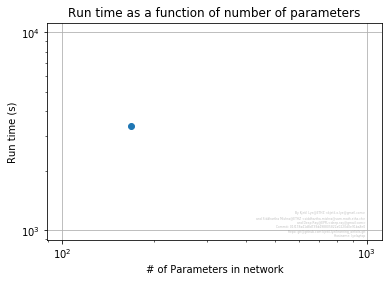

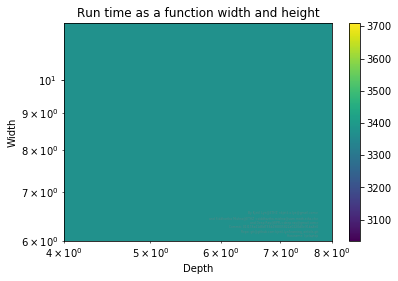

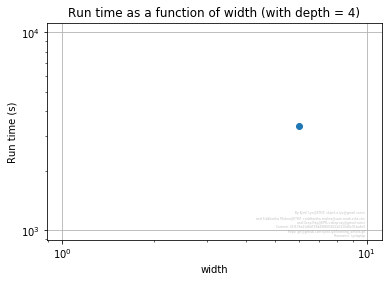

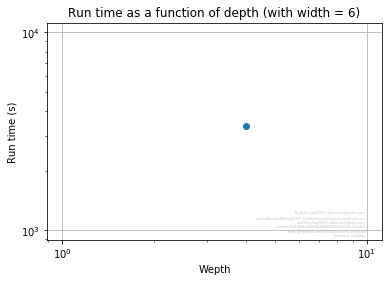

Config 4 x 6 ([0 x 0] / [1 x 1])
Training and postprocessing took: 3622.8150329589844 seconds (60.38025054931641 minutes) (1.0063375091552735 hours)
all_errors_map[Prediction error]=\ 
[[0.01869699]]


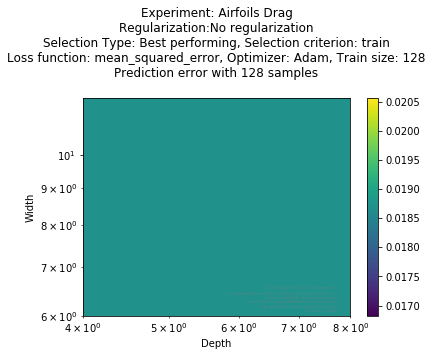

Memory usage: 669724
all_errors_map[Error mean]=\ 
[[0.00078975]]


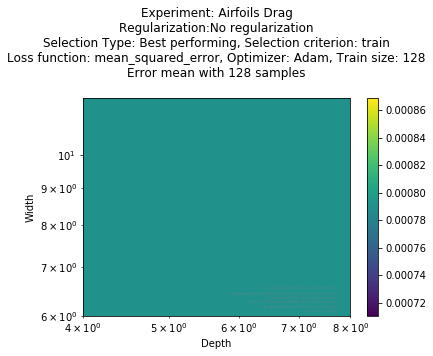

Memory usage: 669724
all_errors_map[Error variance]=\ 
[[0.0044038]]


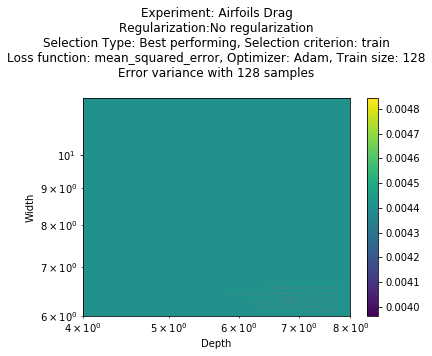

Memory usage: 669724
all_errors_map[Wasserstein]=\ 
[[0.00033146]]


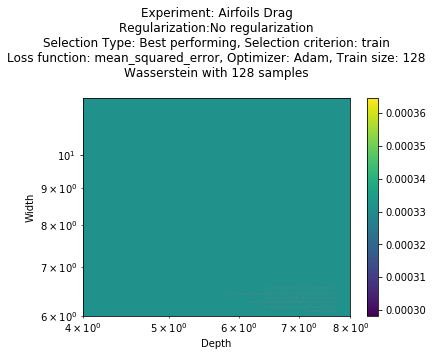

Memory usage: 669724
all_errors_map[Selection error (train)]=\ 
[[0.00025034]]


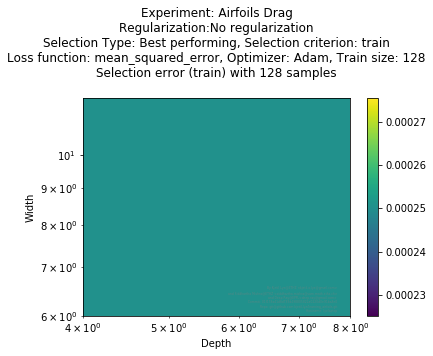

Memory usage: 669724


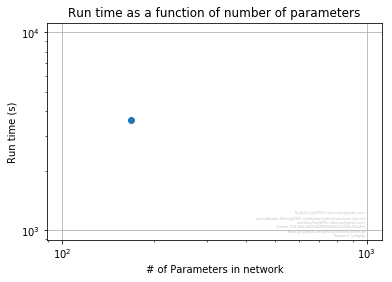

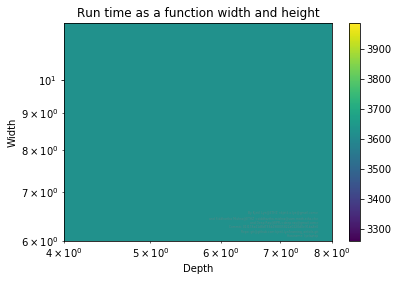

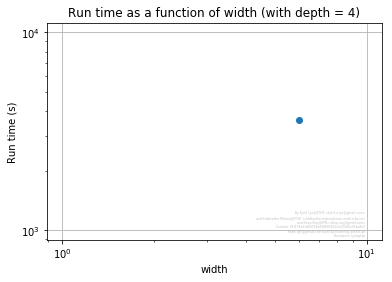

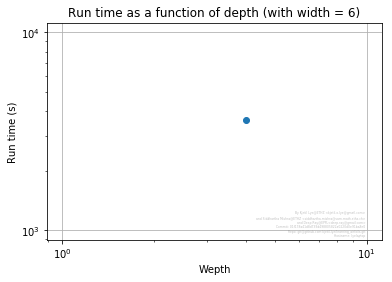

In [3]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    try_best_network_sizes(parameters=qmc_points, 
                           samples=forces[:,n+1], 
                           base_title='Airfoils %s' % force_name,
                          epochs=epochs)

# One network per variable


Training took 1.407780647277832 seconds


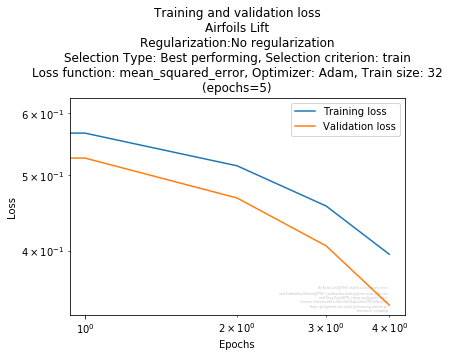


Training took 1.2419612407684326 seconds


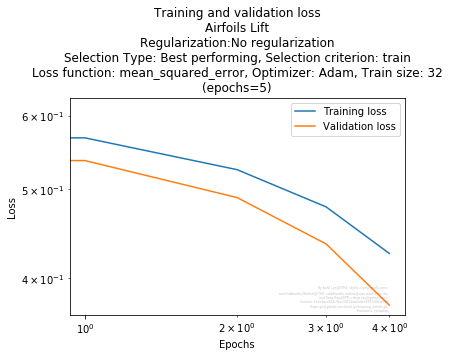


Training took 1.3392360210418701 seconds


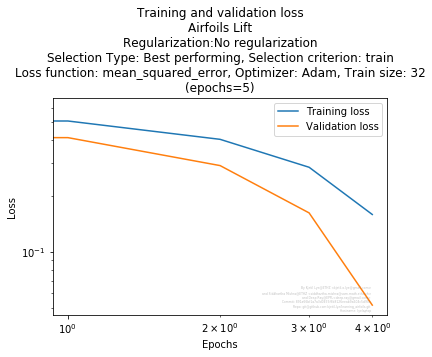


Training took 1.4178223609924316 seconds


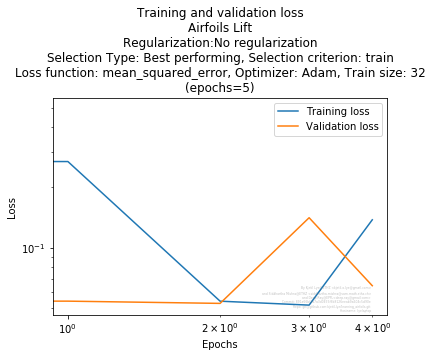


Training took 1.612699270248413 seconds


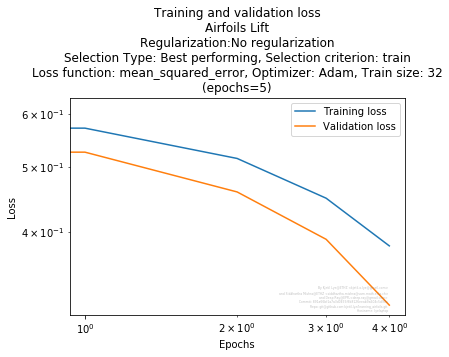

Best network index: 3
Total learning time took: 63 s


#######################################################################################
#AirfoilsLift_Noregularization_Bestperforming_train_mean_squared_error_Adam_32_network#
#######################################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
#######################################################################################


Training took 13.155628442764282 seconds


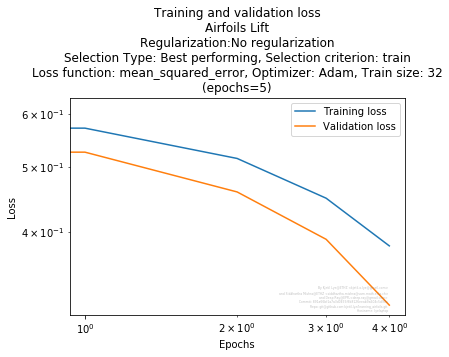

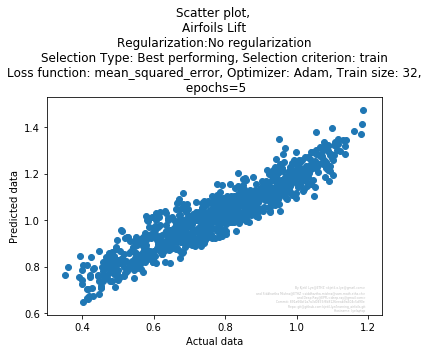

Number of parameters: 1149


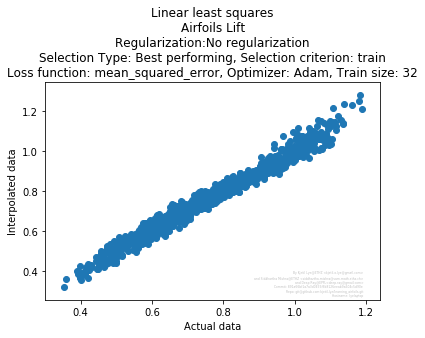

(1001,)
(1001, 6)


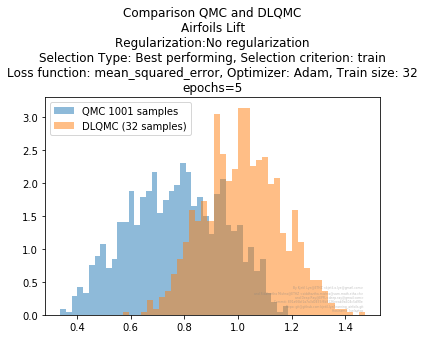

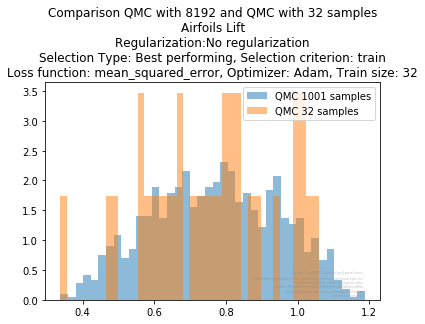

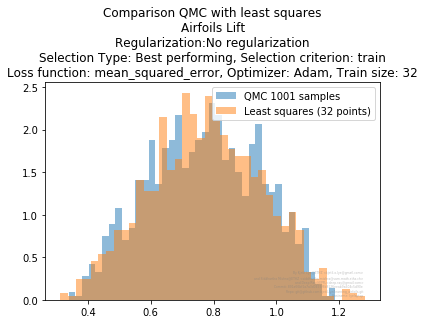

Computing large integration points


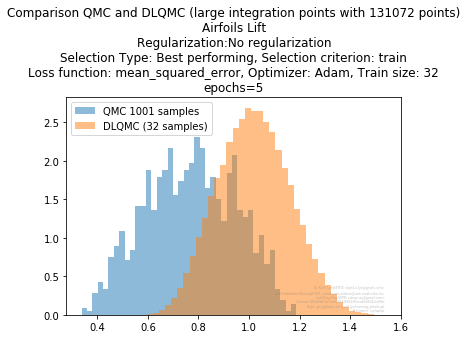

Memory usage: 538324
Memory usage: 538324


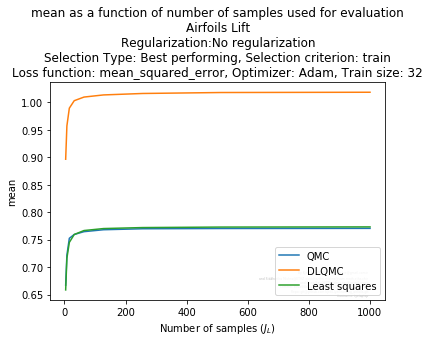

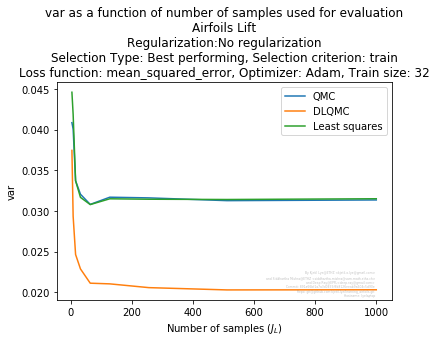

Memory usage: 538324


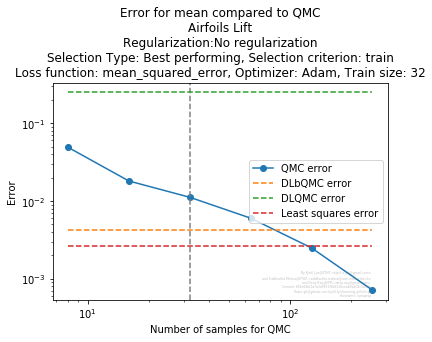

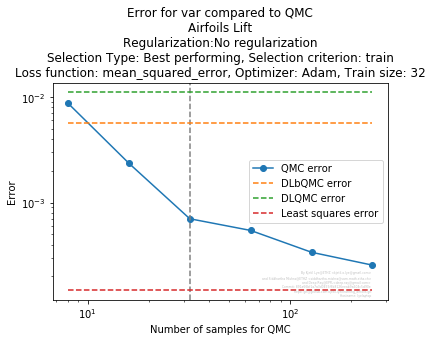

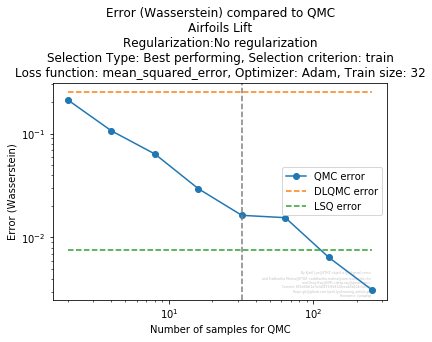

Trying with a large number of QMC samples 131072


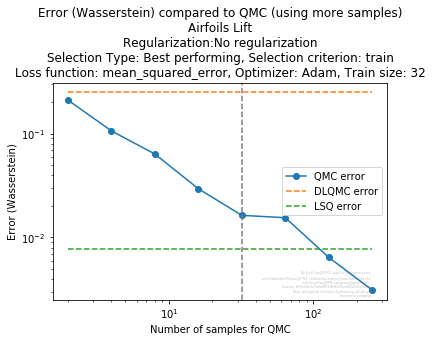

{"main_error": 0.3218030036198856, "variance_error": 0.3520494319453599, "wasserstein_error": 0.24823329003548192, "selection_error": 1.0160907953977585, "prediction_error": 0.33063753847287625}


#############################################################################################
#AirfoilsLift_Noregularization_Bestperforming_train_mean_squared_error_Adam_32_speedup_table#
#############################################################################################
  ------  ------  -------------------  -------------------  ------------------  -------------------  -----------------  -----------------
  QMC 32  QMC 32  DLQMC                DLQMC                DLbQMC              DLbQMC               Least squares      Least squares
  mean    var     mean                 var                  mean                var                  mean               var
Airfoils Lift
Regularization:No regularization
Selection Type: Best performing, Selection criterion: train
Loss function: mea


Training took 1.7168586254119873 seconds


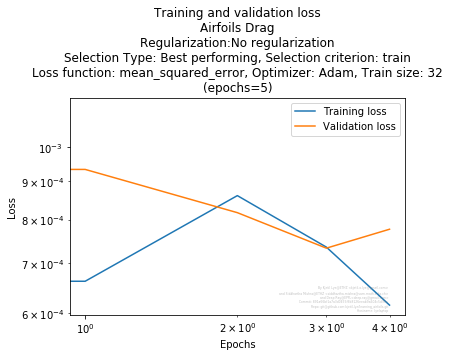


Training took 2.2199442386627197 seconds


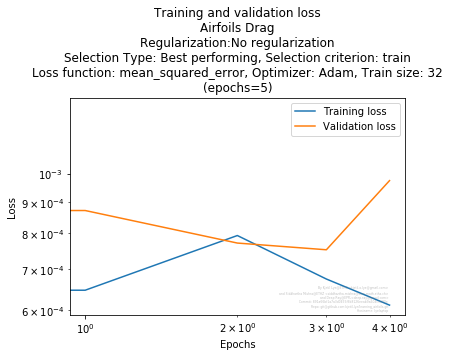


Training took 2.135432243347168 seconds


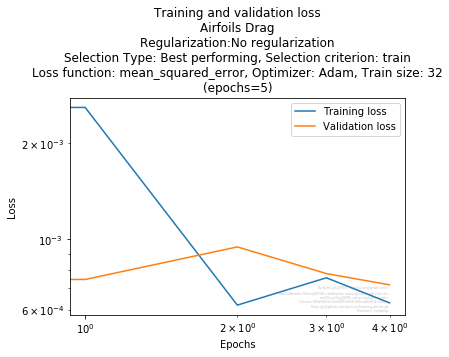


Training took 2.4559881687164307 seconds


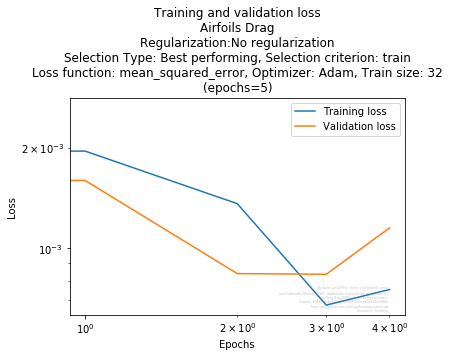


Training took 2.1819541454315186 seconds


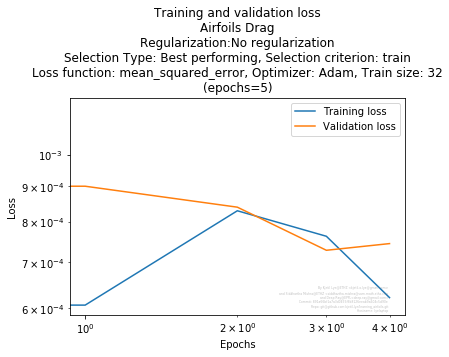

Best network index: 4
Total learning time took: 95 s


#######################################################################################
#AirfoilsDrag_Noregularization_Bestperforming_train_mean_squared_error_Adam_32_network#
#######################################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
#######################################################################################


Training took 20.4335036277771 seconds


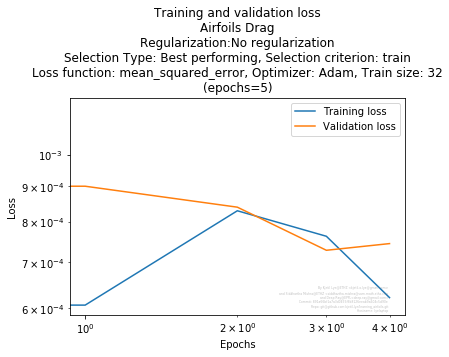

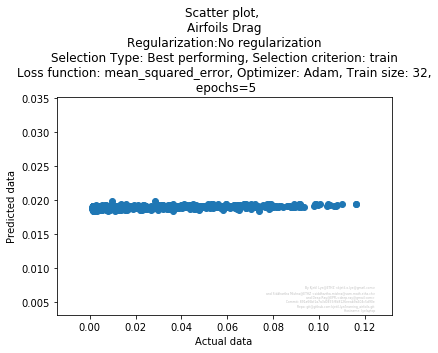

Number of parameters: 1149


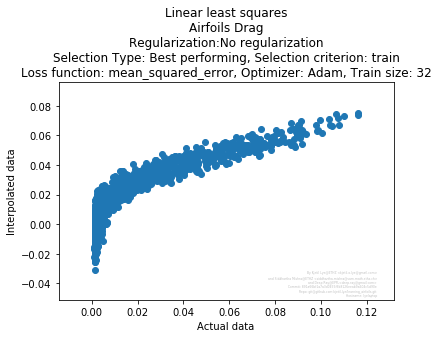

(1001,)
(1001, 6)


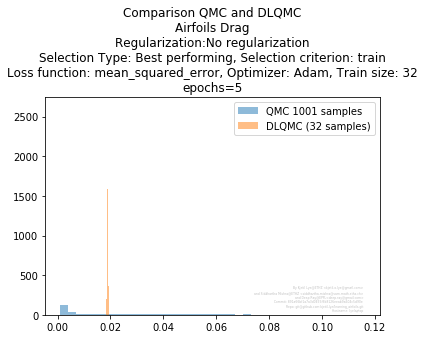

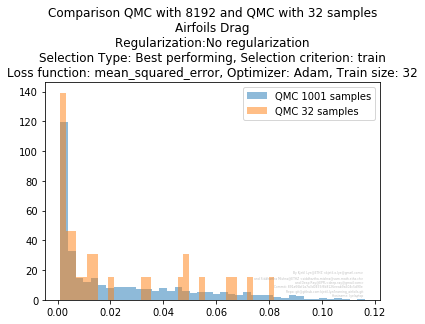

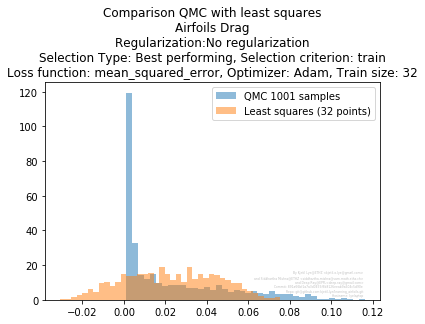

Computing large integration points


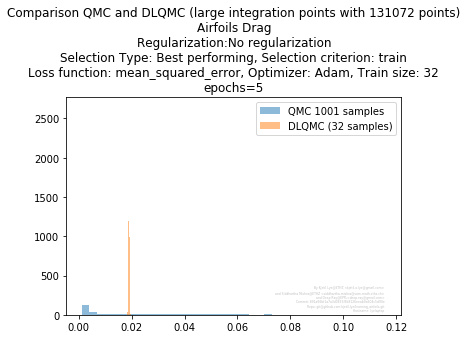

Memory usage: 850016
Memory usage: 850016


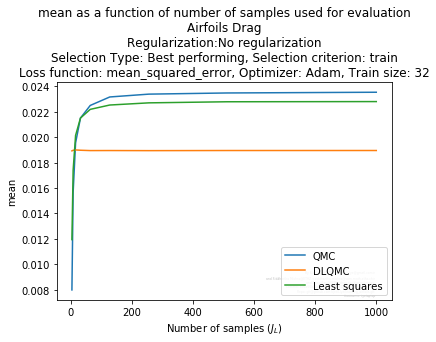

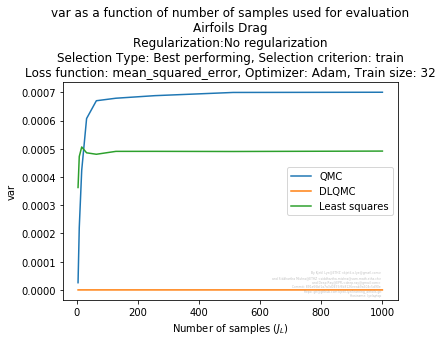

Memory usage: 850016


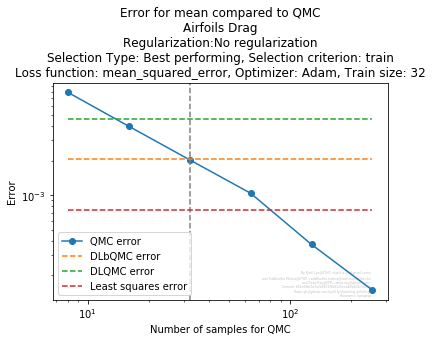

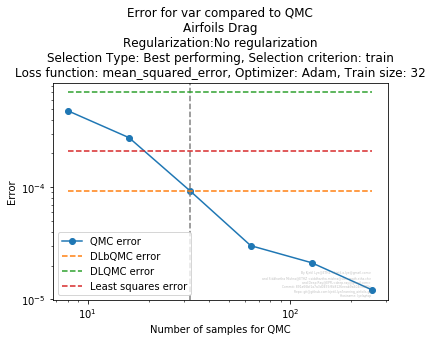

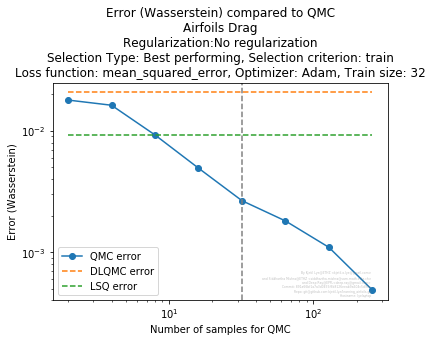

Trying with a large number of QMC samples 131072


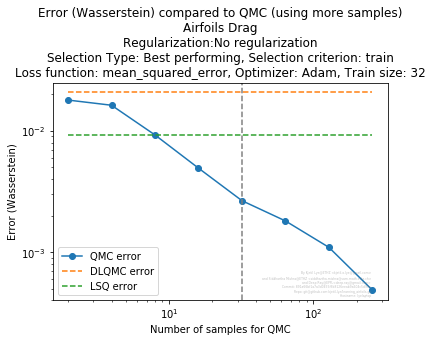

{"main_error": 0.1948088744422991, "variance_error": 0.9999380541516473, "wasserstein_error": 0.020683886354986573, "selection_error": 0.00399163254769519, "prediction_error": 0.7697821033136694}


#############################################################################################
#AirfoilsDrag_Noregularization_Bestperforming_train_mean_squared_error_Adam_32_speedup_table#
#############################################################################################
  ------  ------  ------------------  -------------------  ------------------  ------------------  ------------------  -------------------
  QMC 32  QMC 32  DLQMC               DLQMC                DLbQMC              DLbQMC              Least squares       Least squares
  mean    var     mean                var                  mean                var                 mean                var
Airfoils Drag
Regularization:No regularization
Selection Type: Best performing, Selection criterion: train
Loss function: mea

In [3]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    train_single_network(parameters=qmc_points, 
                         samples=forces[:,n+1], 
                         base_title='Airfoils %s' % force_name,
                         network = airfoils_network,
                         epochs=epochs, 
                         large_integration_points = large_qmc_points)